# Homework Starter: Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [9]:
#!pip install dash jupyter-dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 18.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [jupyter-dash] [dash]]lib-metadata]


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [3]:
data_path = Path('/Users/paramshah/Desktop/bootcamp/homework/stage12_results-reporting-delivery-design-stakeholder-communication/data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Z,58.804613,146.757982,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Y,67.471792,195.343310,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,X,72.477826,170.503828,2025-02-03


## Helper: Export Directory

In [4]:
img_dir = Path('/Users/paramshah/Desktop/bootcamp/homework/stage12_results-reporting-delivery-design-stakeholder-communication/deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


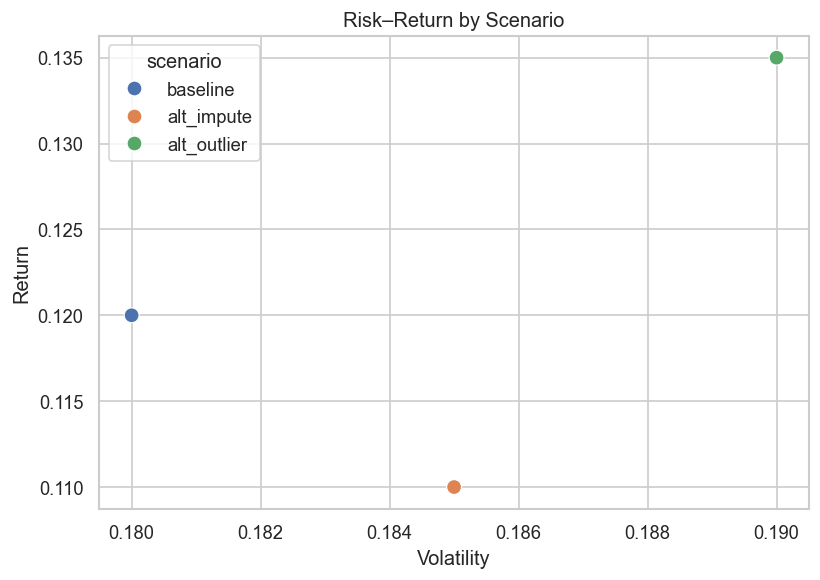

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')
savefig('risk_return.png')
plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


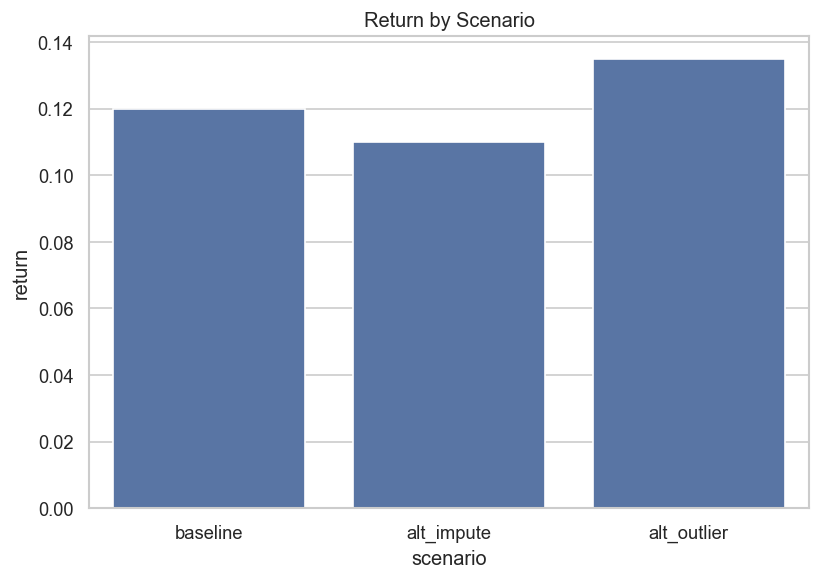

In [6]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='return')
plt.title('Return by Scenario')
savefig('return_by_scenario.png')
plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


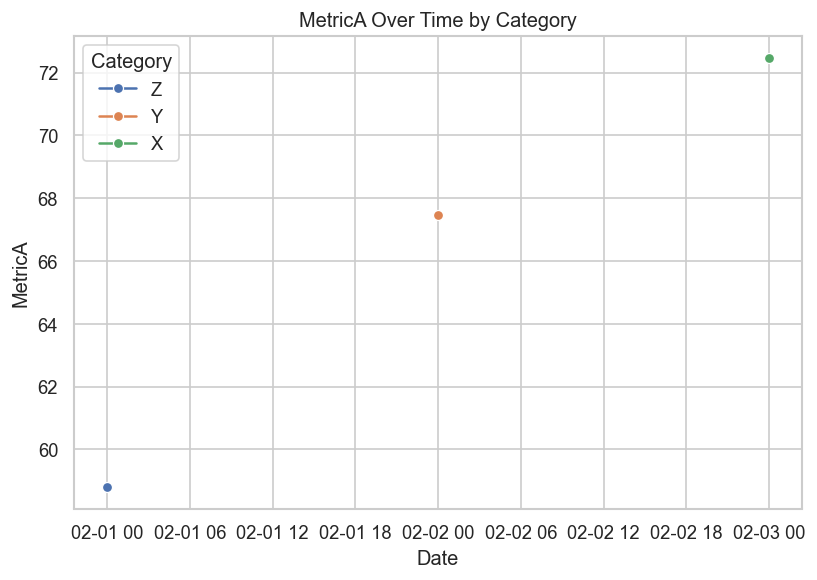

In [7]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig('metricA_over_time.png')
plt.show()

## Sensitivity Analysis / Assumptions Table

In [8]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14


## Interpretations / Takeaways

- **Chart 1 takeaway (Risk–Return tradeoff):**  
  Outlier treatment (green point) improves returns while only slightly increasing volatility.  
  Mean imputation (orange point) lowers returns with higher volatility, the least attractive profile.  
  Baseline (blue) is moderate, but not optimal.  
  → *Data cleaning choices significantly shift the risk–return balance.*

- **Chart 2 takeaway (Return by Scenario):**  
  Returns are highest when outliers are treated (13.5%), lowest with mean imputation (11%).  
  → *Return outcomes are sensitive to preprocessing assumptions, showing real financial consequences of technical choices.*

- **Chart 3 takeaway (MetricA by Category):**  
  MetricA varies meaningfully across categories: Z (~58.8), Y (~67.5), X (~72.5).  
  → *Category X consistently shows stronger underlying metrics, suggesting greater robustness or upside potential in that grouping.*

**Assumptions & Sensitivities:**  
- Assumes volatility is a good proxy for risk.  
- Assumes Sharpe ratio is an adequate performance measure (may understate tail risks).  
- Results are sensitive to data preprocessing (imputation choice, outlier rule).  
- Small sample size may not generalize fully.  


## Decision Implications

- **Opportunities:**  
  - Applying robust outlier treatment improves portfolio risk-adjusted returns.  
  - Category X shows stronger performance on MetricA, which may indicate a priority area for investment or further analysis.

- **Risks:**  
  - Naive data imputation (mean) reduces performance and introduces potential bias.  
  - Over-reliance on Sharpe ratio may mask tail risks.  
  - Limited sample size means results should be validated on larger datasets.

- **Recommended Next Steps:**  
  - Prioritize robust preprocessing (median imputation, outlier filtering) in decision models.  
  - Further analyze Category X for sustained advantages.  
  - Run sensitivity checks with additional scenarios (e.g., alternative outlier rules, stress testing).  
  - Present results with both baseline and adjusted scenarios to stakeholders for transparent decision-making.  
